Nama    : Andreas Christianto
NIM     : 2440023002

### AdaLine

In [1]:
import numpy as np

In [2]:
class AdalineGD(object):

	"""ADAptive LInear NEuron classifier.

	Parameters
	-----------
	eta : float
		Learning rate (between 0.0 and 1.0)
	n_iter : int
		Passes over the training dataset.

	Attributes
	-----------
	w_ : 1d-array
		Weights after fitting.
	errors_ : list
		Number of misclassifications in every epoch.

	"""

	def __init__(self, eta = 0.01, n_iter = 50):
		self.eta = eta
		self.n_iter = n_iter

	def fit(self, X, y):

		""" Fit training data.

		Parameters
		-----------
		X : {array-like}, shape = [n_samples, n_features]
			Training vectors,
			where n_samples is the number of samples and
			n_features is the number of features.
		y : array-like, shape = [n_samples]
			Target values.

		Return
		-------
		self : object

		"""

		self.w_ = np.zeros(1 + X.shape[1])
		# print(self.w_)
		self.cost_ = []

		for i in range(int(self.n_iter)):
			output = self.net_input(X)
			errors = (y - output)
			self.w_[1:] += self.eta * X.T.dot(errors)
			self.w_[0] += self.eta * errors.sum()
			cost = (errors ** 2).sum() / 2.0
			self.cost_.append(cost)

		return self

	def net_input(self, X):

		""" Calculate net input """

		return np.dot(X, self.w_[1:]) + self.w_[0]

	def activation(self, X):

		""" Compute linear activation """

		return self.net_input(X)

	def predict(self, X):

		""" Return class label after unit step """

		return np.where(self.activation(X) >= 0.0, 1, -1)

	def accuracy(self, X, y):
		predictions = self.predict(X)
		accuracy = np.mean(predictions == y) * 100
		return accuracy

### Data

In [3]:
X = [0.08, 0.72], [0.26, 0.58], [0.45, 0.15], [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], [0.70, 0.65], [0.92, 0.45]
X = np.array(X)
y = [1, 1, 1, 1, -1, -1, -1, -1]
y = np.array(y)

### Import Library

In [4]:
adaline = AdalineGD(eta=0.1, n_iter=200)
adaline.fit(X,y)

In [5]:
predictions = adaline.predict(X)

In [6]:
print(predictions)

[ 1  1  1  1 -1 -1 -1 -1]


In [7]:
accuracy = adaline.accuracy(X, y)
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 100.00%


### MSE Curve

In [8]:
import matplotlib.pyplot as plt

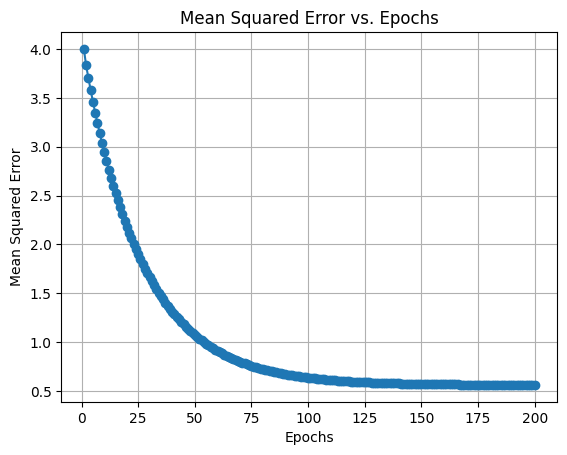

In [9]:
plt.plot(range(1, len(adaline.cost_) + 1), adaline.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epochs')
plt.grid()
plt.show()

### AdaLine

In [10]:
from deap import algorithms, base, creator, tools
import numpy as np

# Define the fitness function
def fitness_function(individual):
    adaline = AdalineGD(eta=individual[0], n_iter=int(individual[1]))
    adaline.fit(X, y)
    accuracy = adaline.accuracy(X, y)
    return accuracy,

# Define GA parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("eta", np.random.uniform, 0.01, 0.1)
toolbox.register("n_iter", np.random.randint, 50, 200)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.eta, toolbox.n_iter), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Initialize population
population = toolbox.population(n=50)

# Run the genetic algorithm
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, verbose=True)

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
print("Best individual:", best_individual)
adaline = AdalineGD(eta=best_individual[0], n_iter=best_individual[1])
adaline.fit(X, y)
accuracy = adaline.accuracy(X, y)
print(f'Accuracy: {accuracy:.2f}%')

gen	nevals
0  	50    
1  	28    


C:\Users\Andreas Christianto\AppData\Local\Temp\ipykernel_6828\1212362124.py:53: RuntimeWarning: overflow encountered in square
  cost = (errors ** 2).sum() / 2.0


2  	32    
3  	30    
4  	28    
5  	28    
6  	26    
7  	23    
8  	30    
9  	35    
10 	29    
11 	26    
12 	29    
13 	32    
14 	39    
15 	30    
16 	32    
17 	34    
18 	31    
19 	33    
20 	33    
21 	32    
22 	39    
23 	43    
24 	25    
25 	29    
26 	29    
27 	33    
28 	22    
29 	33    
30 	30    


c:\Users\Andreas Christianto\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


31 	35    
32 	20    
33 	34    
34 	27    
35 	25    
36 	34    
37 	22    
38 	28    
39 	30    
40 	33    
41 	29    
42 	33    
43 	35    
44 	30    
45 	28    
46 	29    
47 	29    
48 	27    
49 	29    
50 	26    
Best individual: [0.06632244394991751, 108.77425151430072]
Accuracy: 100.00%


In [13]:
import numpy as np
import pyswarms as ps

# Define the fitness function
def fitness_function(x, X, y):
    eta = x[0][0]  # Accessing the first element of the first dimension
    n_iter = int(x[0][1])
    adaline = AdalineGD(eta=eta, n_iter=n_iter)
    adaline.fit(X, y)
    accuracy = adaline.accuracy(X, y)
    return -accuracy  # PSO minimizes the function, so we negate the accuracy

# Define PSO parameters
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Set the lower and upper bounds for eta and n_iter
lb = np.array([0.01, 50])
ub = np.array([0.1, 200])

# Create the optimizer
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=(lb, ub))

# Perform optimization
best_cost, best_params = optimizer.optimize(fitness_function, iters=50, X=X, y=y)

# Print the results
print("Optimized parameters: eta={}, n_iter={}".format(best_params[0], int(best_params[1])))
print("Best accuracy:", -best_cost)

2024-05-23 23:29:39,479 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/50, best_cost=-100

pyswarms.single.global_best: 100%|██████████|50/50, best_cost=-100
2024-05-23 23:29:39,967 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -100.0, best pos: [ 0.06749596 66.31766251]


Optimized parameters: eta=0.06749596011519435, n_iter=66
Best accuracy: 100.0
